In [1]:
import selective_inference.lasso_si 
import selective_inference.lars_si as ls
import selective_inference.lasso_si as la
import selective_inference.sfs_si as ss
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
i = 0
# np.random.seed(1234)
p_array = np.empty(0)

while i < 300:
    print(i)
    X = np.random.randn(15,5)
    beta = np.zeros(5)
    y = X @ beta + np.random.randn(15)

    p,a = la.parametric_lasso_si(X,y,0.1)

    i+=1
    p_array = np.hstack([p_array,p])

print(p_array)
print(np.count_nonzero(p_array <= 0.05)/p_array.size)

0
[0, 2]
[-3.7957143100015545, -0.5445982259000999] [0, 2]
[-0.5445982259001, -0.22735498841582208] [0]
[-0.22735498841582213, 0.20486842527869517] []
[0.2048684252786952, 1.451693659369783] [0]
[1.4516936593697791, 1.4755666143358304] [0, 4]
[1.4755666143358301, 3.7957143100015545] [0, 2, 4]
finished search in statistic line
[-2.1412612282291064, -0.08751081002731202] [0, 2]
[-0.08751081002731202, 0.050039179398204604] [0]
[0.050039179398204604, 1.6728104195374454] [0, 2]
[1.672810419537447, 2.1412612282291064] [2]
finished search in statistic line
1
[0, 1, 3]
[-3.006994326440289, -0.16377542815264595] [0, 1, 3, 4]
[-0.163775428152646, -0.10766793450977995] [1, 3, 4]
[-0.1076679345097805, 0.11232097966102737] [1, 3]
[0.11232097966102725, 1.2580608665347428] [0, 1, 3]
[1.2580608665347441, 2.4444455672250798] [0, 3]
[2.444445567225104, 2.552069272917939] [0, 2, 3]
[2.5520692729179375, 3.006994326440289] [0, 1, 2, 3]
finished search in statistic line
[-2.2404396779909783, -1.700952339890

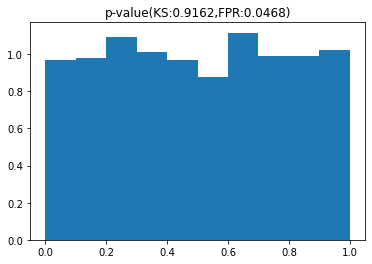

In [4]:
p_array
import matplotlib.pyplot as plt
import math
from scipy import stats
fpr = (np.count_nonzero(p_array <= 0.05)/p_array.size)
result = stats.kstest(p_array,stats.uniform(loc=0,scale=1).cdf)
plt.hist(p_array,bins=10,density=True)
plt.title(f"p-value(KS:{math.floor(result.pvalue * 10 ** 4)/(10 ** 4)},FPR:{math.floor(fpr * 10 ** 4)/(10 ** 4)})")
plt.savefig("lars_cv_fpr.pdf")